In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from Bio import SeqIO

import bokeh.plotting
from bokeh.models import BasicTicker, PrintfTickFormatter
from bokeh.palettes import viridis, RdBu
from bokeh.transform import linear_cmap
from bokeh.plotting import figure, show, output_file, save

from matplotlib.colors import to_hex
cmap = plt.colormaps["bwr_r"]
bwr_r = [to_hex(cmap(i)) for i in np.linspace(0, 1, 256)]
cmap = plt.colormaps["gray_r"]
gray = [to_hex(cmap(i)) for i in np.linspace(0, 1, 256)]
palette = viridis(256)

AA_ALPHABETS = "ACDEFGHIKLMNPQRSTVWY-"
from pssm_analysis import calc_information_content, plot_logomaker 

In [2]:
### Specify the sequence and the ESM2 model used 
name = 'CeVSRA-1'
model = 'esm2_t36_3B_UR50D'

# Conservation

In [3]:
esm2_conservation_path = f'/home/moon/projects/AgoAnalysis/esm2/{name}/{name}_conservation_{model}.csv.gz'

with gzip.open(esm2_conservation_path, 'rt') as f:
    esm2_df = pd.read_csv(f, sep=',', index_col=0)

esm2_pivot_df = esm2_df.pivot(index='Position', columns='Amino Acid', values='Probability')
esm2_pivot_df.reset_index(drop=True, inplace=True)
esm2_pivot_df.index = esm2_pivot_df.index + 1  # Convert from 0-index to 1-index

background_dict = {aa: 1/20 for aa in AA_ALPHABETS}
esm2_ic_df = calc_information_content(esm2_pivot_df, background_dict)

In [ ]:
title = f'Probabilities in ESM2 Conservation of {name}'
plot_logomaker(esm2_pivot_df.iloc[:, 0:20], title=title, ylim=1, color_name='charge')
plt.savefig(f'/home/moon/projects/AgoAnalysis/esm2/{name}/{name}.{model}.pssm_logo.png')
plt.show()

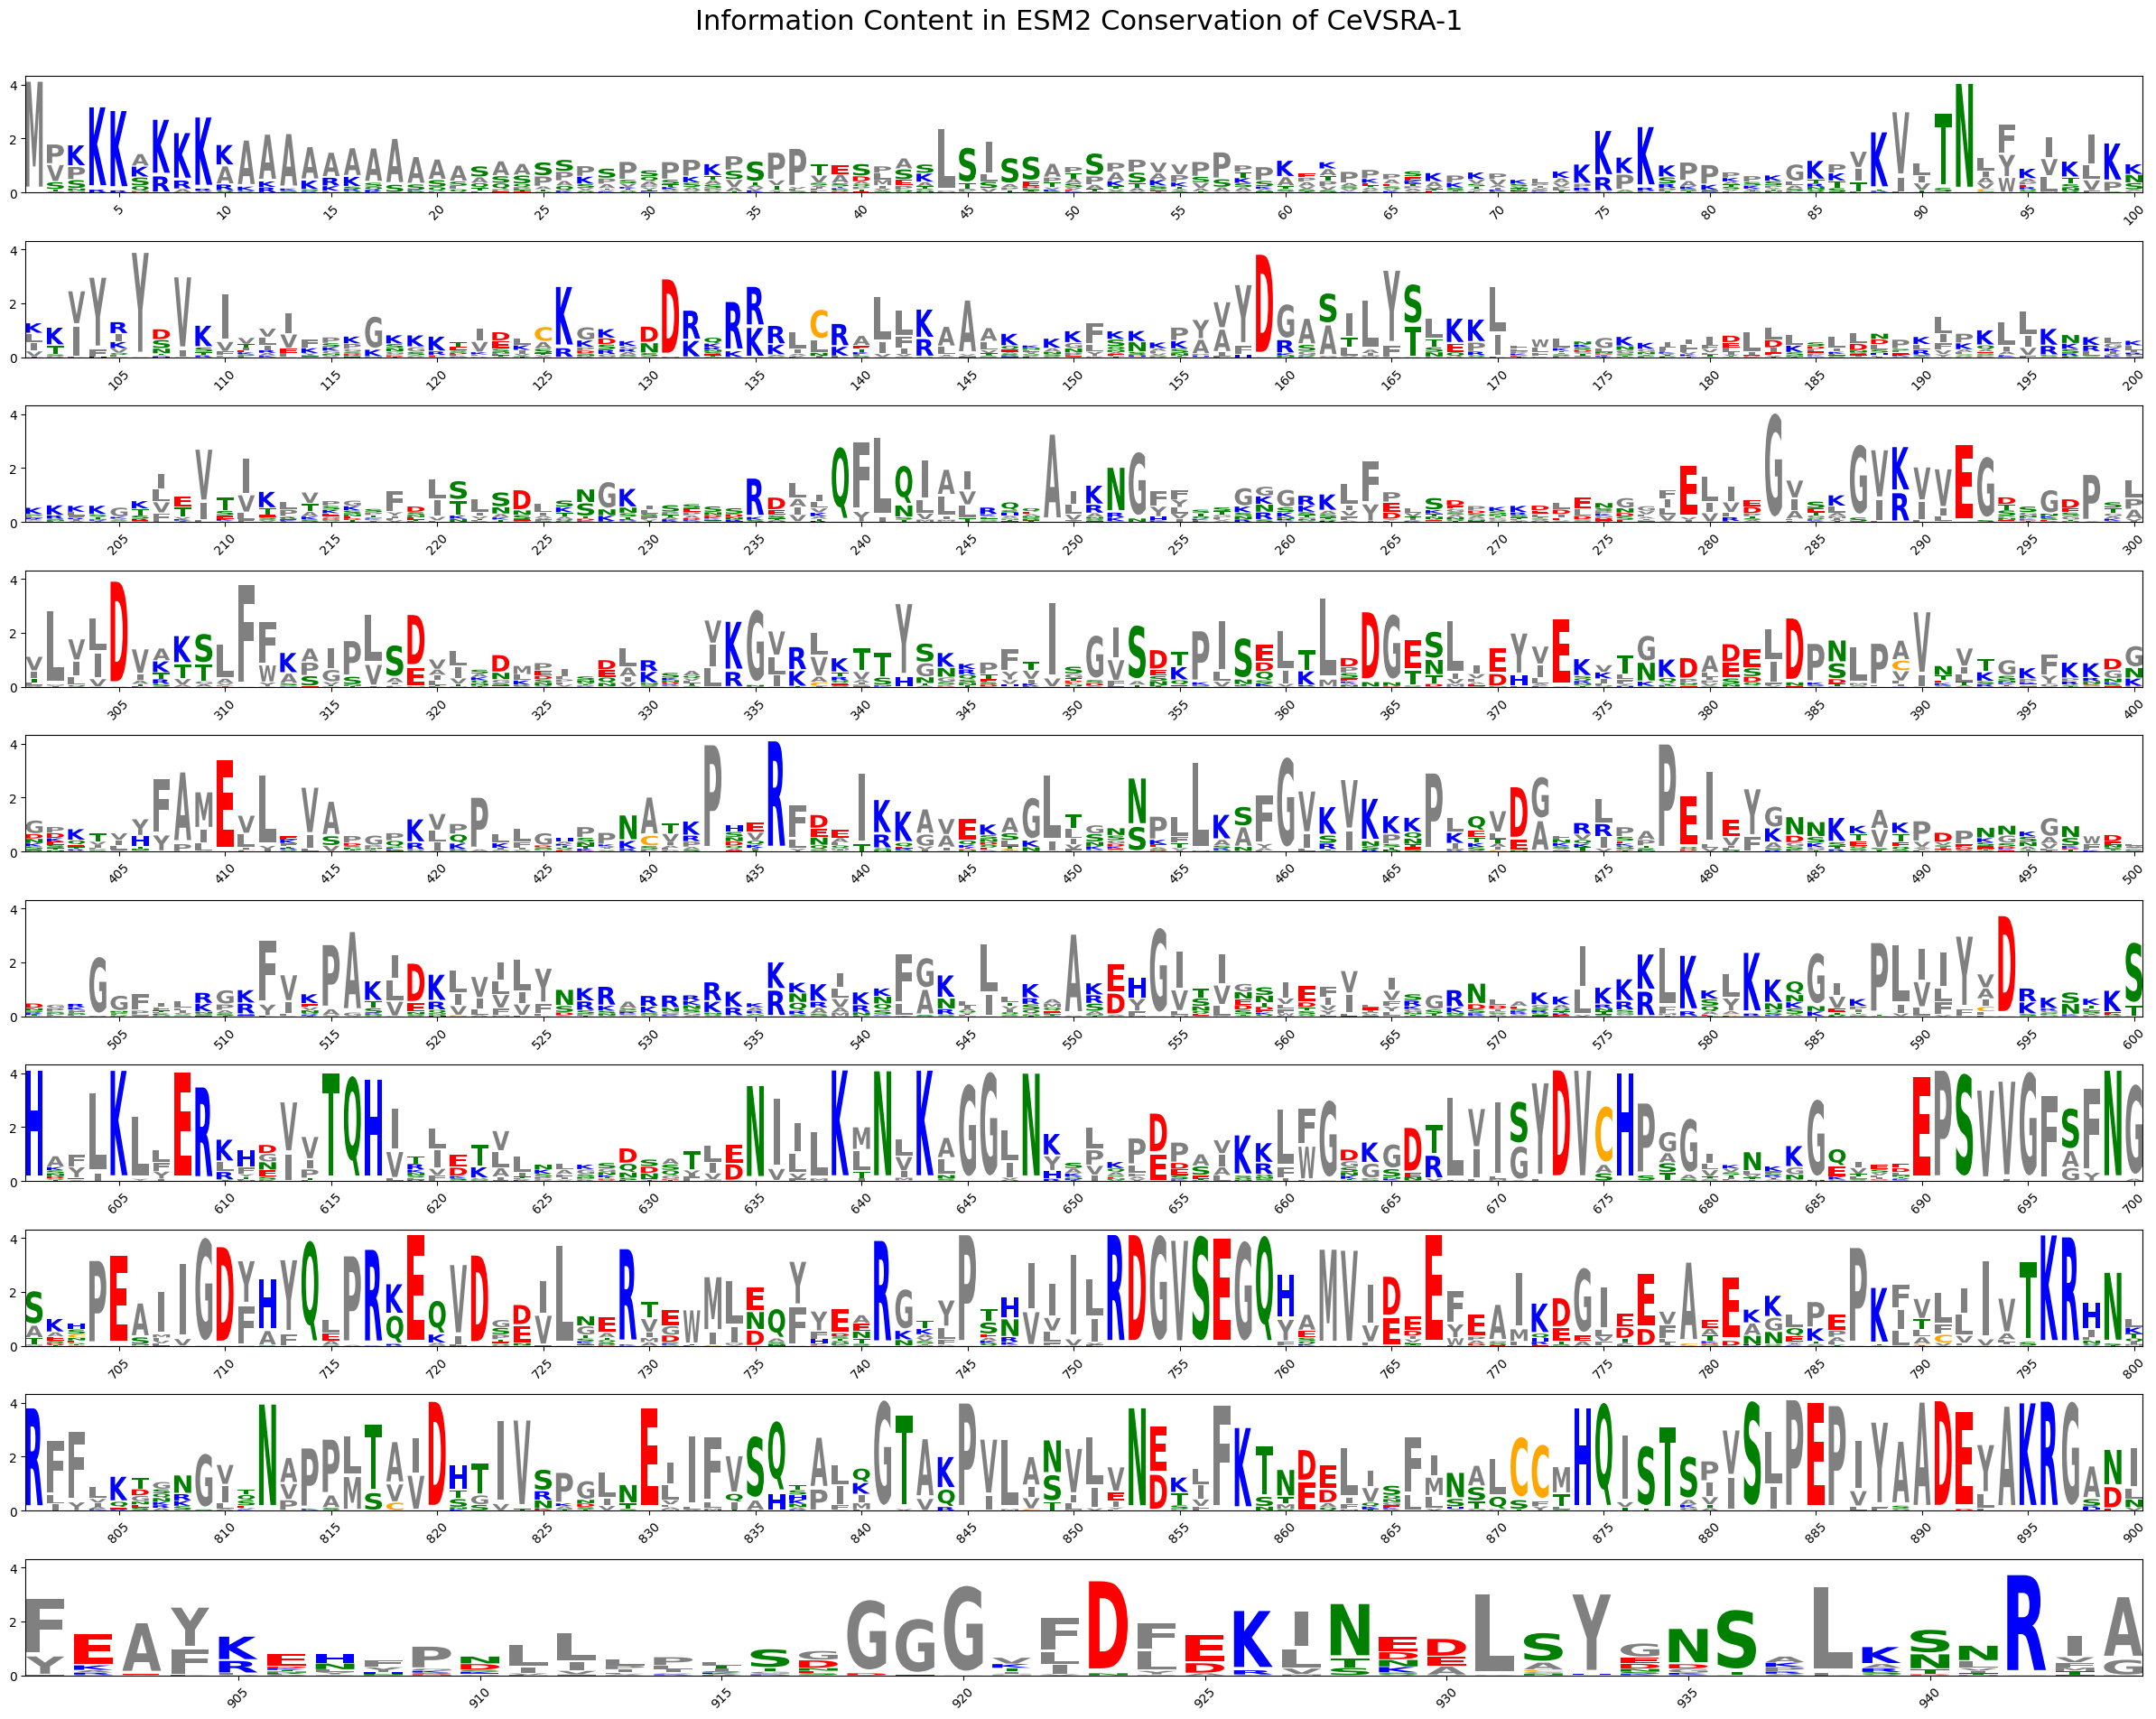

In [4]:
title = f'Information Content in ESM2 Conservation of {name}'
plot_logomaker(esm2_ic_df.iloc[:, 0:20], title=title, color_name='charge')
plt.savefig(f'/home/moon/projects/AgoAnalysis/esm2/{name}/{name}.{model}.info_logo.pdf')
plt.show()

# Coevolution

In [ ]:
esm2_coevolution_path = f'/home/moon/projects/AgoAnalysis/esm2/{name}/{name}_coevolution_{model}.csv.gz'

with gzip.open(esm2_coevolution_path, 'rt') as f:
    df = pd.read_csv(f, sep=',', index_col=0)


def get_fasta(infasta):
    for record in SeqIO.parse(infasta, "fasta"):
        return str(record.seq)

infasta = f'/home/moon/projects/AgoAnalysis/esm2/{name}/{name}.txt'
seq = get_fasta(infasta)

In [ ]:
df

In [ ]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
p = figure(title="COEVOLUTION",
          x_range=[str(x) for x in range(1,len(seq)+1)],
          y_range=[str(x) for x in range(1,len(seq)+1)][::-1],
          width=800, height=800,
          tools=TOOLS, toolbar_location='below',
          tooltips=[('i', '@i'), ('j', '@j'), ('value', '@value')])

r = p.rect(x="i", y="j", width=1, height=1, source=df,
          fill_color=linear_cmap('value', palette, low=df.value.min(), high=df.value.max()),
          line_color=None)
p.xaxis.visible = False  # Hide the x-axis
p.yaxis.visible = False  # Hide the x-axis
# show(p)

In [ ]:
output_file(f"/home/moon/projects/AgoAnalysis/esm2/{name}/{name}_coevolution_{model}_color.html")
save(p)